<a href="https://colab.research.google.com/github/HenriqueRuschel/datascience/blob/main/PredicaoPhishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse projeto tem como objetivo a construção de um modelo de machine learning para predição de links, imagens e sites mal intencionados.

In [ ]:
from platform import python_version
print('Versão da Linguagem Python usada neste projeto: ', python_version())

Versão da Linguagem Python usada neste projeto:  3.10.12


In [4]:
# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste notebook.
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00


In [1]:
!pip install -q mlxtend

In [2]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Métricas e Relatórios
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

# Grid searching e Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Predição de Phishing" --iversions

Author: Predição de Phishing

matplotlib: 3.7.1
pandas    : 1.5.3
seaborn   : 0.12.2
mlxtend   : 0.22.0
numpy     : 1.23.5
sklearn   : 1.2.2



Carregando os dados

In [7]:
# Carrega o dataset
dados = pd.read_csv('/content/dataset.csv', header = 0)

In [8]:
# Shape
dados.shape

(10000, 32)

In [9]:
# Amostra dos dados (5 primeiras linhas)
dados.head()

,indice,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


Análise Exploratória e Limpeza dos Dados

In [10]:
# Colunas do dataset
dados.columns

Index(['indice', 'endereco_ip', 'comprimento_url', 'servico_encurtamento',
       'simbolo_at', 'redirecionamento_double_slash', 'prefixo_sufixo',
       'sub_dominio', 'certificado_ssl', 'comprimento_dominio', 'favicon',
       'porta', 'token_https', 'url_request', 'url_anchor', 'links_tags',
       'SFH', 'submit_email', 'url_anormal', 'redirecionamento',
       'on_mouseover', 'right_click', 'pop_up_window', 'iframe',
       'idade_dominio', 'registro_dns', 'trafego_web', 'page_rank',
       'indice_google', 'links_apontando_pagina', 'relatorio_estatistico',
       'resultado'],
      dtype='object')

In [12]:
# Amostra dos dados (5 registros aleatórios)
dados.sample(5)

,indice,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
2442,2443,1,-1,1,-1,1,-1,0,0,1,...,1,1,1,-1,-1,-1,1,1,1,-1
3591,3592,1,-1,1,1,1,-1,1,1,-1,...,-1,1,1,-1,1,1,1,1,1,1
6911,6912,1,-1,1,1,1,-1,-1,1,-1,...,1,1,-1,1,1,-1,1,0,1,1
8569,8570,-1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
3843,3844,1,1,1,1,1,-1,1,1,1,...,-1,1,1,-1,1,-1,-1,0,1,1


In [13]:
# Tipos dos dados
dados.dtypes

indice                           int64
endereco_ip                      int64
comprimento_url                  int64
servico_encurtamento             int64
simbolo_at                       int64
redirecionamento_double_slash    int64
prefixo_sufixo                   int64
sub_dominio                      int64
certificado_ssl                  int64
comprimento_dominio              int64
favicon                          int64
porta                            int64
token_https                      int64
url_request                      int64
url_anchor                       int64
links_tags                       int64
SFH                              int64
submit_email                     int64
url_anormal                      int64
redirecionamento                 int64
on_mouseover                     int64
right_click                      int64
pop_up_window                    int64
iframe                           int64
idade_dominio                    int64
registro_dns             

In [14]:
# Resumo estatístico
dados.describe()

,indice,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,0.354600,-0.635000,0.73960,0.710200,0.74060,-0.735400,0.037900,0.253700,-0.338800,...,0.613600,0.816200,0.00060,0.335200,0.290700,-0.46480,0.723800,0.343900,0.704800,0.11260
std,2886.89568,0.935065,0.764613,0.67308,0.704035,0.67198,0.677667,0.812976,0.911273,0.940905,...,0.789657,0.577798,1.00005,0.942194,0.832864,0.88546,0.690044,0.569794,0.709442,0.99369
min,1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000
25%,2500.75000,-1.000000,-1.000000,1.00000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.00000,-1.000000,0.000000,-1.00000,1.000000,0.000000,1.000000,-1.00000
50%,5000.50000,1.000000,-1.000000,1.00000,1.000000,1.00000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,-1.00000,1.000000,0.000000,1.000000,1.00000
75%,7500.25000,1.000000,-1.000000,1.00000,1.000000,1.00000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000
max,10000.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


In [15]:
# A coluna de índice não é necessária para a análise. Vamos removê-la.
del dados['indice']

In [16]:
dados.shape

(10000, 31)

In [17]:
# Vamos verificar se há problema de valores ausentes
dados.isnull().sum()

endereco_ip                      0
comprimento_url                  0
servico_encurtamento             0
simbolo_at                       0
redirecionamento_double_slash    0
prefixo_sufixo                   0
sub_dominio                      0
certificado_ssl                  0
comprimento_dominio              0
favicon                          0
porta                            0
token_https                      0
url_request                      0
url_anchor                       0
links_tags                       0
SFH                              0
submit_email                     0
url_anormal                      0
redirecionamento                 0
on_mouseover                     0
right_click                      0
pop_up_window                    0
iframe                           0
idade_dominio                    0
registro_dns                     0
trafego_web                      0
page_rank                        0
indice_google                    0
links_apontando_pagi

In [18]:
# Amostra dos dados (5 registros aleatórios)
dados.sample(5)

,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,favicon,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
4406,-1,-1,-1,1,-1,-1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1123,1,-1,1,-1,1,-1,-1,1,-1,1,...,1,1,1,1,1,1,-1,0,1,1
7098,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,0,1,1,0,1,-1
5789,-1,-1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,0,1,1,0,1,-1
8915,1,-1,1,-1,1,-1,1,-1,-1,-1,...,-1,-1,1,1,0,-1,1,0,1,-1


In [19]:
# Vamos verificar se há valores duplicado (linhas idênticas)
dados[dados.duplicated()].sum()

endereco_ip                      2697
comprimento_url                 -3019
servico_encurtamento             3507
simbolo_at                       3885
redirecionamento_double_slash    3543
prefixo_sufixo                  -3275
sub_dominio                        53
certificado_ssl                  1645
comprimento_dominio             -1697
favicon                          3129
porta                            3595
token_https                      3233
url_request                      1183
url_anchor                        -49
links_tags                       -383
SFH                             -2879
submit_email                     3229
url_anormal                      3393
redirecionamento                  453
on_mouseover                     3707
right_click                      4273
pop_up_window                    3069
iframe                           3911
idade_dominio                     113
registro_dns                      927
trafego_web                      1663
page_rank   

In [20]:
# Vamos remover os valores duplicados
dados.drop_duplicates(keep = 'first', inplace = True)

In [21]:
# Vamos verificar se há valores duplicadod (linhas idênticas)
dados[dados.duplicated()].sum().sum()

0.0

In [22]:
dados.shape

(5389, 31)

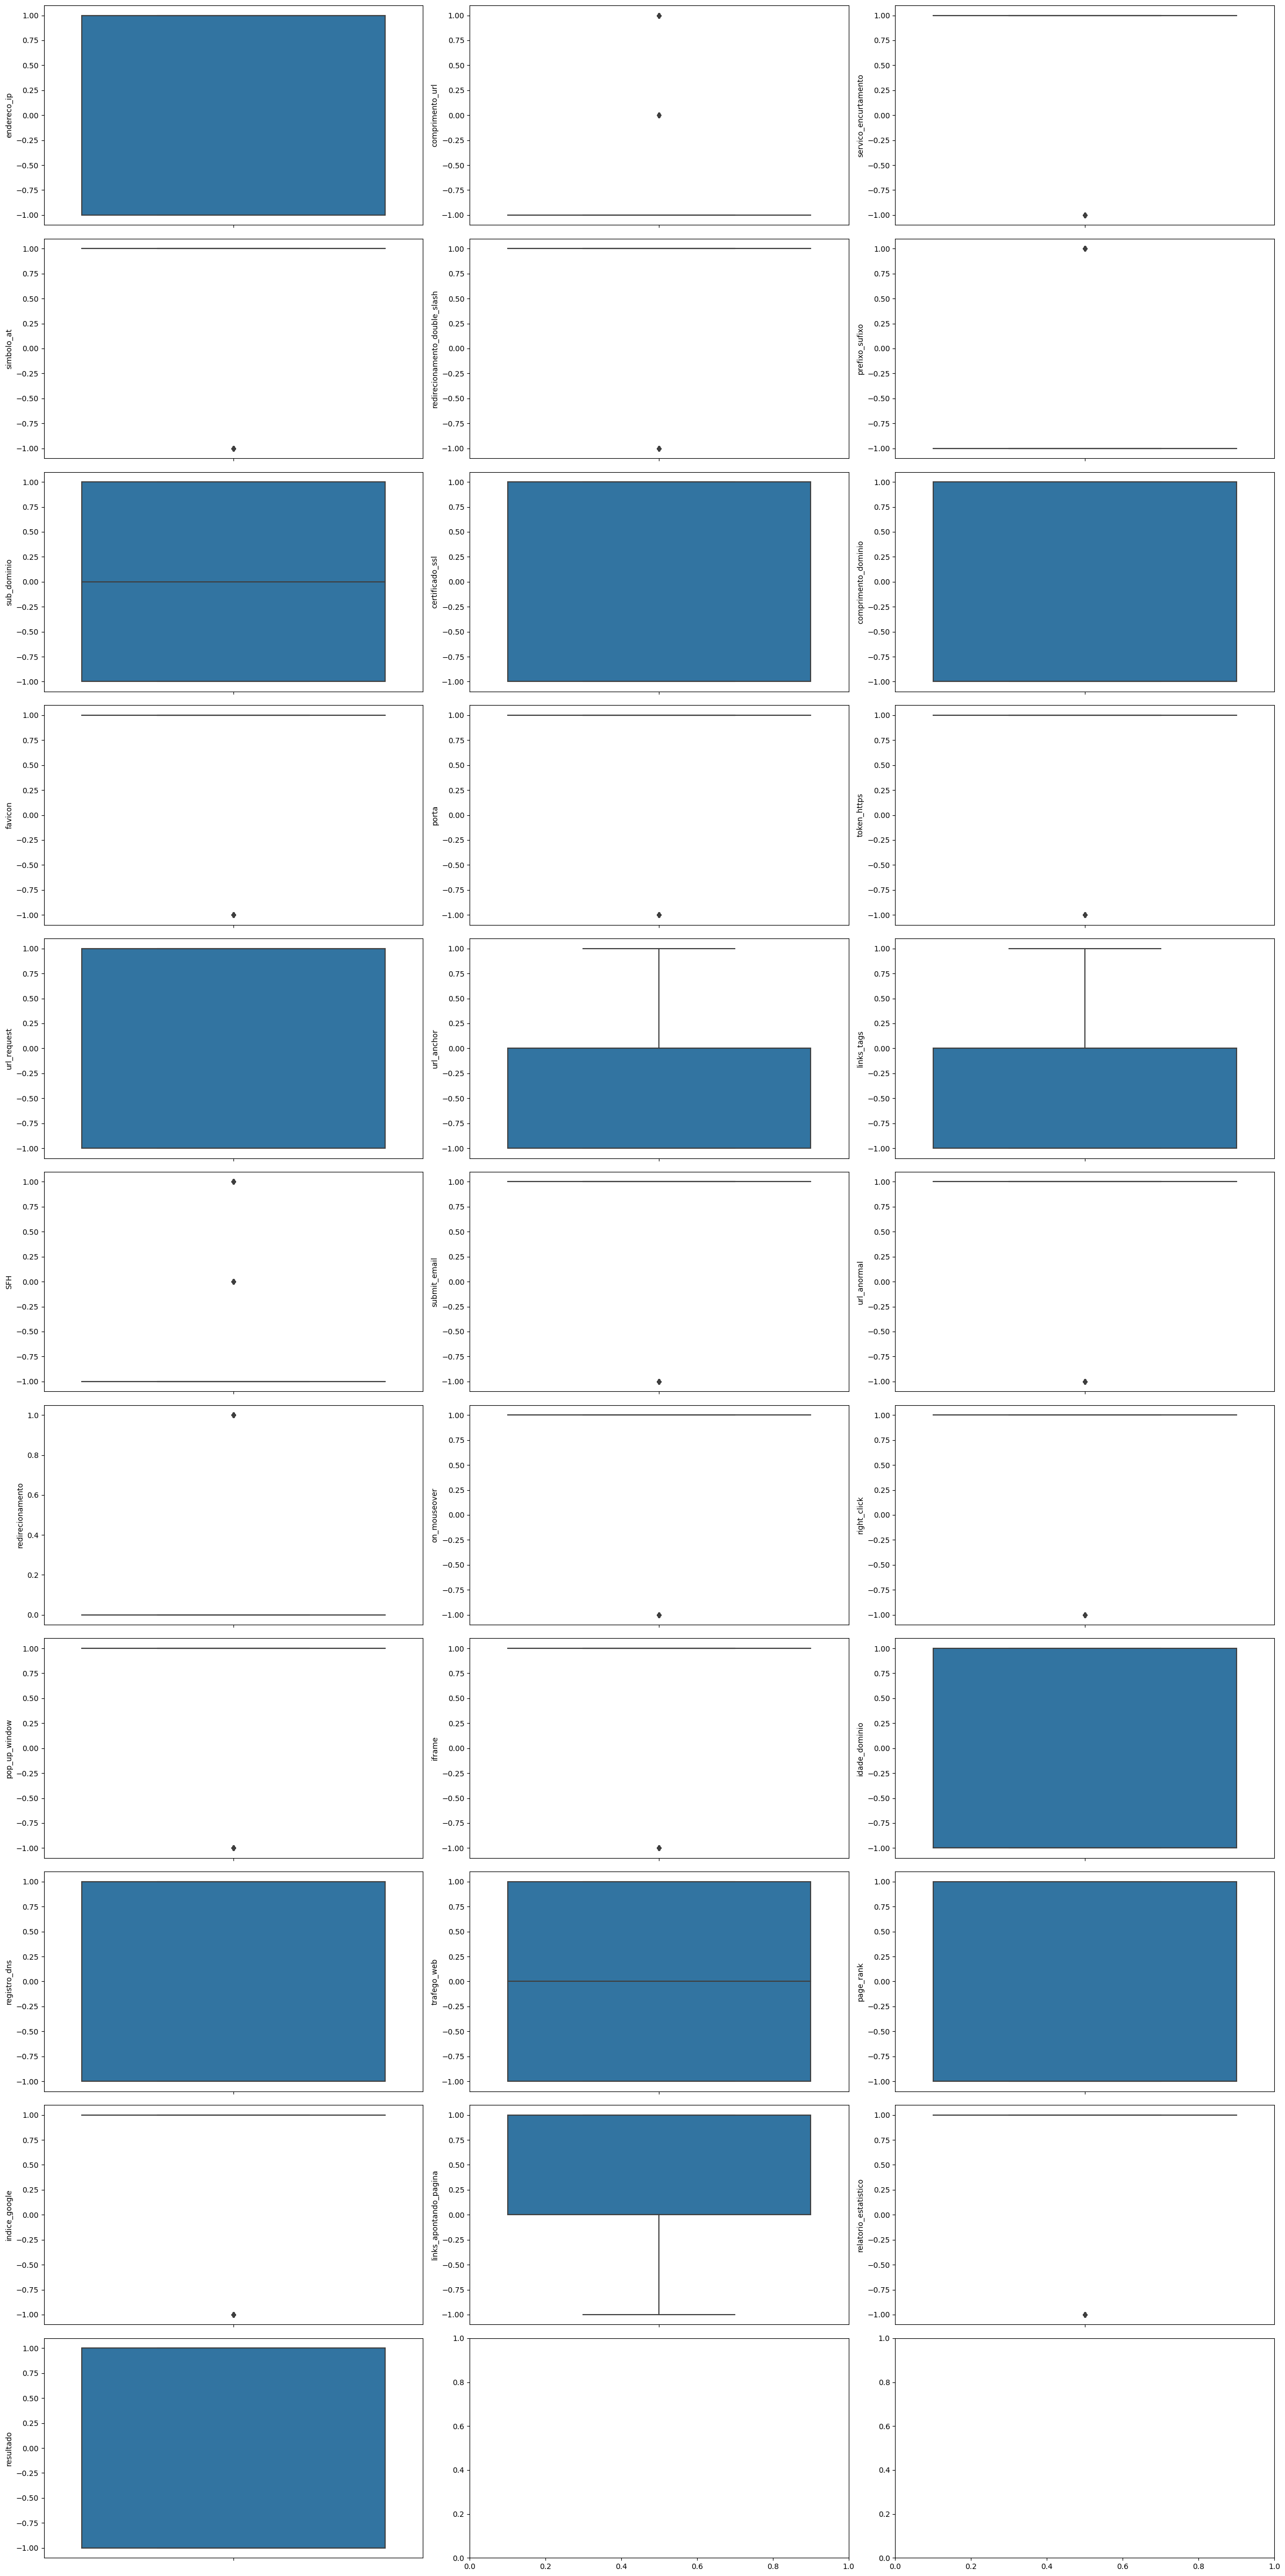

In [23]:
# Verificando valores extremos (outliers) - valores que podem influenciar o modelo;
names = list(dados.columns)
f, axes = plt.subplots(round(len(names) / 3) + 1, 3, figsize = (24, 48))
y = 0
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(y = dados[name], ax = axes[i, j]) # Gráfico
    y = y + 1

plt.tight_layout()
plt.show()

In [24]:
# Verificando os valores únicos de cada variável
for col_name in dados.columns:
    print('A variável [' + col_name + '] tem', dados[col_name].nunique(),
          'valores únicos, que são:', dados[col_name].unique())

A variável [endereco_ip] tem 2 valores únicos, que são: [-1  1]
A variável [comprimento_url] tem 3 valores únicos, que são: [ 1  0 -1]
A variável [servico_encurtamento] tem 2 valores únicos, que são: [ 1 -1]
A variável [simbolo_at] tem 2 valores únicos, que são: [ 1 -1]
A variável [redirecionamento_double_slash] tem 2 valores únicos, que são: [-1  1]
A variável [prefixo_sufixo] tem 2 valores únicos, que são: [-1  1]
A variável [sub_dominio] tem 3 valores únicos, que são: [-1  0  1]
A variável [certificado_ssl] tem 3 valores únicos, que são: [-1  1  0]
A variável [comprimento_dominio] tem 2 valores únicos, que são: [-1  1]
A variável [favicon] tem 2 valores únicos, que são: [ 1 -1]
A variável [porta] tem 2 valores únicos, que são: [ 1 -1]
A variável [token_https] tem 2 valores únicos, que são: [-1  1]
A variável [url_request] tem 2 valores únicos, que são: [ 1 -1]
A variável [url_anchor] tem 3 valores únicos, que são: [-1  0  1]
A variável [links_tags] tem 3 valores únicos, que são: [ 1

Análise de Correlação

In [26]:
# avaliando as correlações entre as variáveis por tabela;
corr = dados.corr()
corr

,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,favicon,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
endereco_ip,1.000000,-0.038320,0.316050,0.148540,0.305726,0.020593,-0.073633,0.065495,-0.010409,0.077500,...,0.091370,0.051756,-0.001155,-0.091961,-0.003595,-0.097105,0.008106,-0.315630,-0.051005,0.095586
comprimento_url,-0.038320,1.000000,-0.115106,-0.062763,-0.086178,0.065774,-0.011812,0.045471,-0.223230,-0.004520,...,-0.016653,0.004899,0.246596,-0.043408,0.005420,0.174315,-0.003547,-0.035851,-0.032840,0.054015
servico_encurtamento,0.316050,-0.115106,1.000000,0.116086,0.814745,-0.078495,-0.054725,-0.068507,0.066999,-0.002292,...,0.031845,0.020605,-0.058390,0.470354,-0.039705,-0.001255,0.206032,-0.186796,0.039821,-0.080312
simbolo_at,0.148540,-0.062763,0.116086,1.000000,0.099836,-0.015577,-0.048767,0.025959,0.021060,0.358670,...,0.339844,0.324146,-0.001648,-0.028651,0.010905,-0.060400,0.022587,-0.018967,-0.082191,0.042589
redirecionamento_double_slash,0.305726,-0.086178,0.814745,0.099836,1.000000,-0.083503,-0.058469,-0.042536,0.050218,0.021740,...,0.043527,0.012884,-0.059706,0.463915,-0.050889,-0.016505,0.237099,-0.166590,0.021893,-0.043130
prefixo_sufixo,0.020593,0.065774,-0.078495,-0.015577,-0.083503,1.000000,0.096136,0.278662,-0.109733,-0.015390,...,-0.013658,-0.044058,0.074979,-0.024002,0.127665,-0.014350,0.061811,0.076355,0.014425,0.378866
sub_dominio,-0.073633,-0.011812,-0.054725,-0.048767,-0.058469,0.096136,1.000000,0.246312,-0.082531,-0.027635,...,-0.032604,0.005603,0.044671,0.090762,-0.032569,0.098199,0.073698,0.019415,0.086878,0.276641
certificado_ssl,0.065495,0.045471,-0.068507,0.025959,-0.042536,0.278662,0.246312,1.000000,-0.186487,-0.027667,...,-0.023895,-0.007737,0.134766,0.025369,0.247840,0.013925,0.073996,0.018522,0.093249,0.693899
comprimento_dominio,-0.010409,-0.223230,0.066999,0.021060,0.050218,-0.109733,-0.082531,-0.186487,1.000000,0.060647,...,0.058324,0.004105,-0.076738,0.011803,-0.124376,-0.051296,-0.028812,0.103261,-0.023100,-0.227927
favicon,0.077500,-0.004520,-0.002292,0.358670,0.021740,-0.015390,-0.027635,-0.027667,0.060647,1.000000,...,0.933508,0.616087,-0.008794,0.055602,-0.064450,0.022094,-0.022421,-0.118695,0.207202,-0.022675


<Axes: >

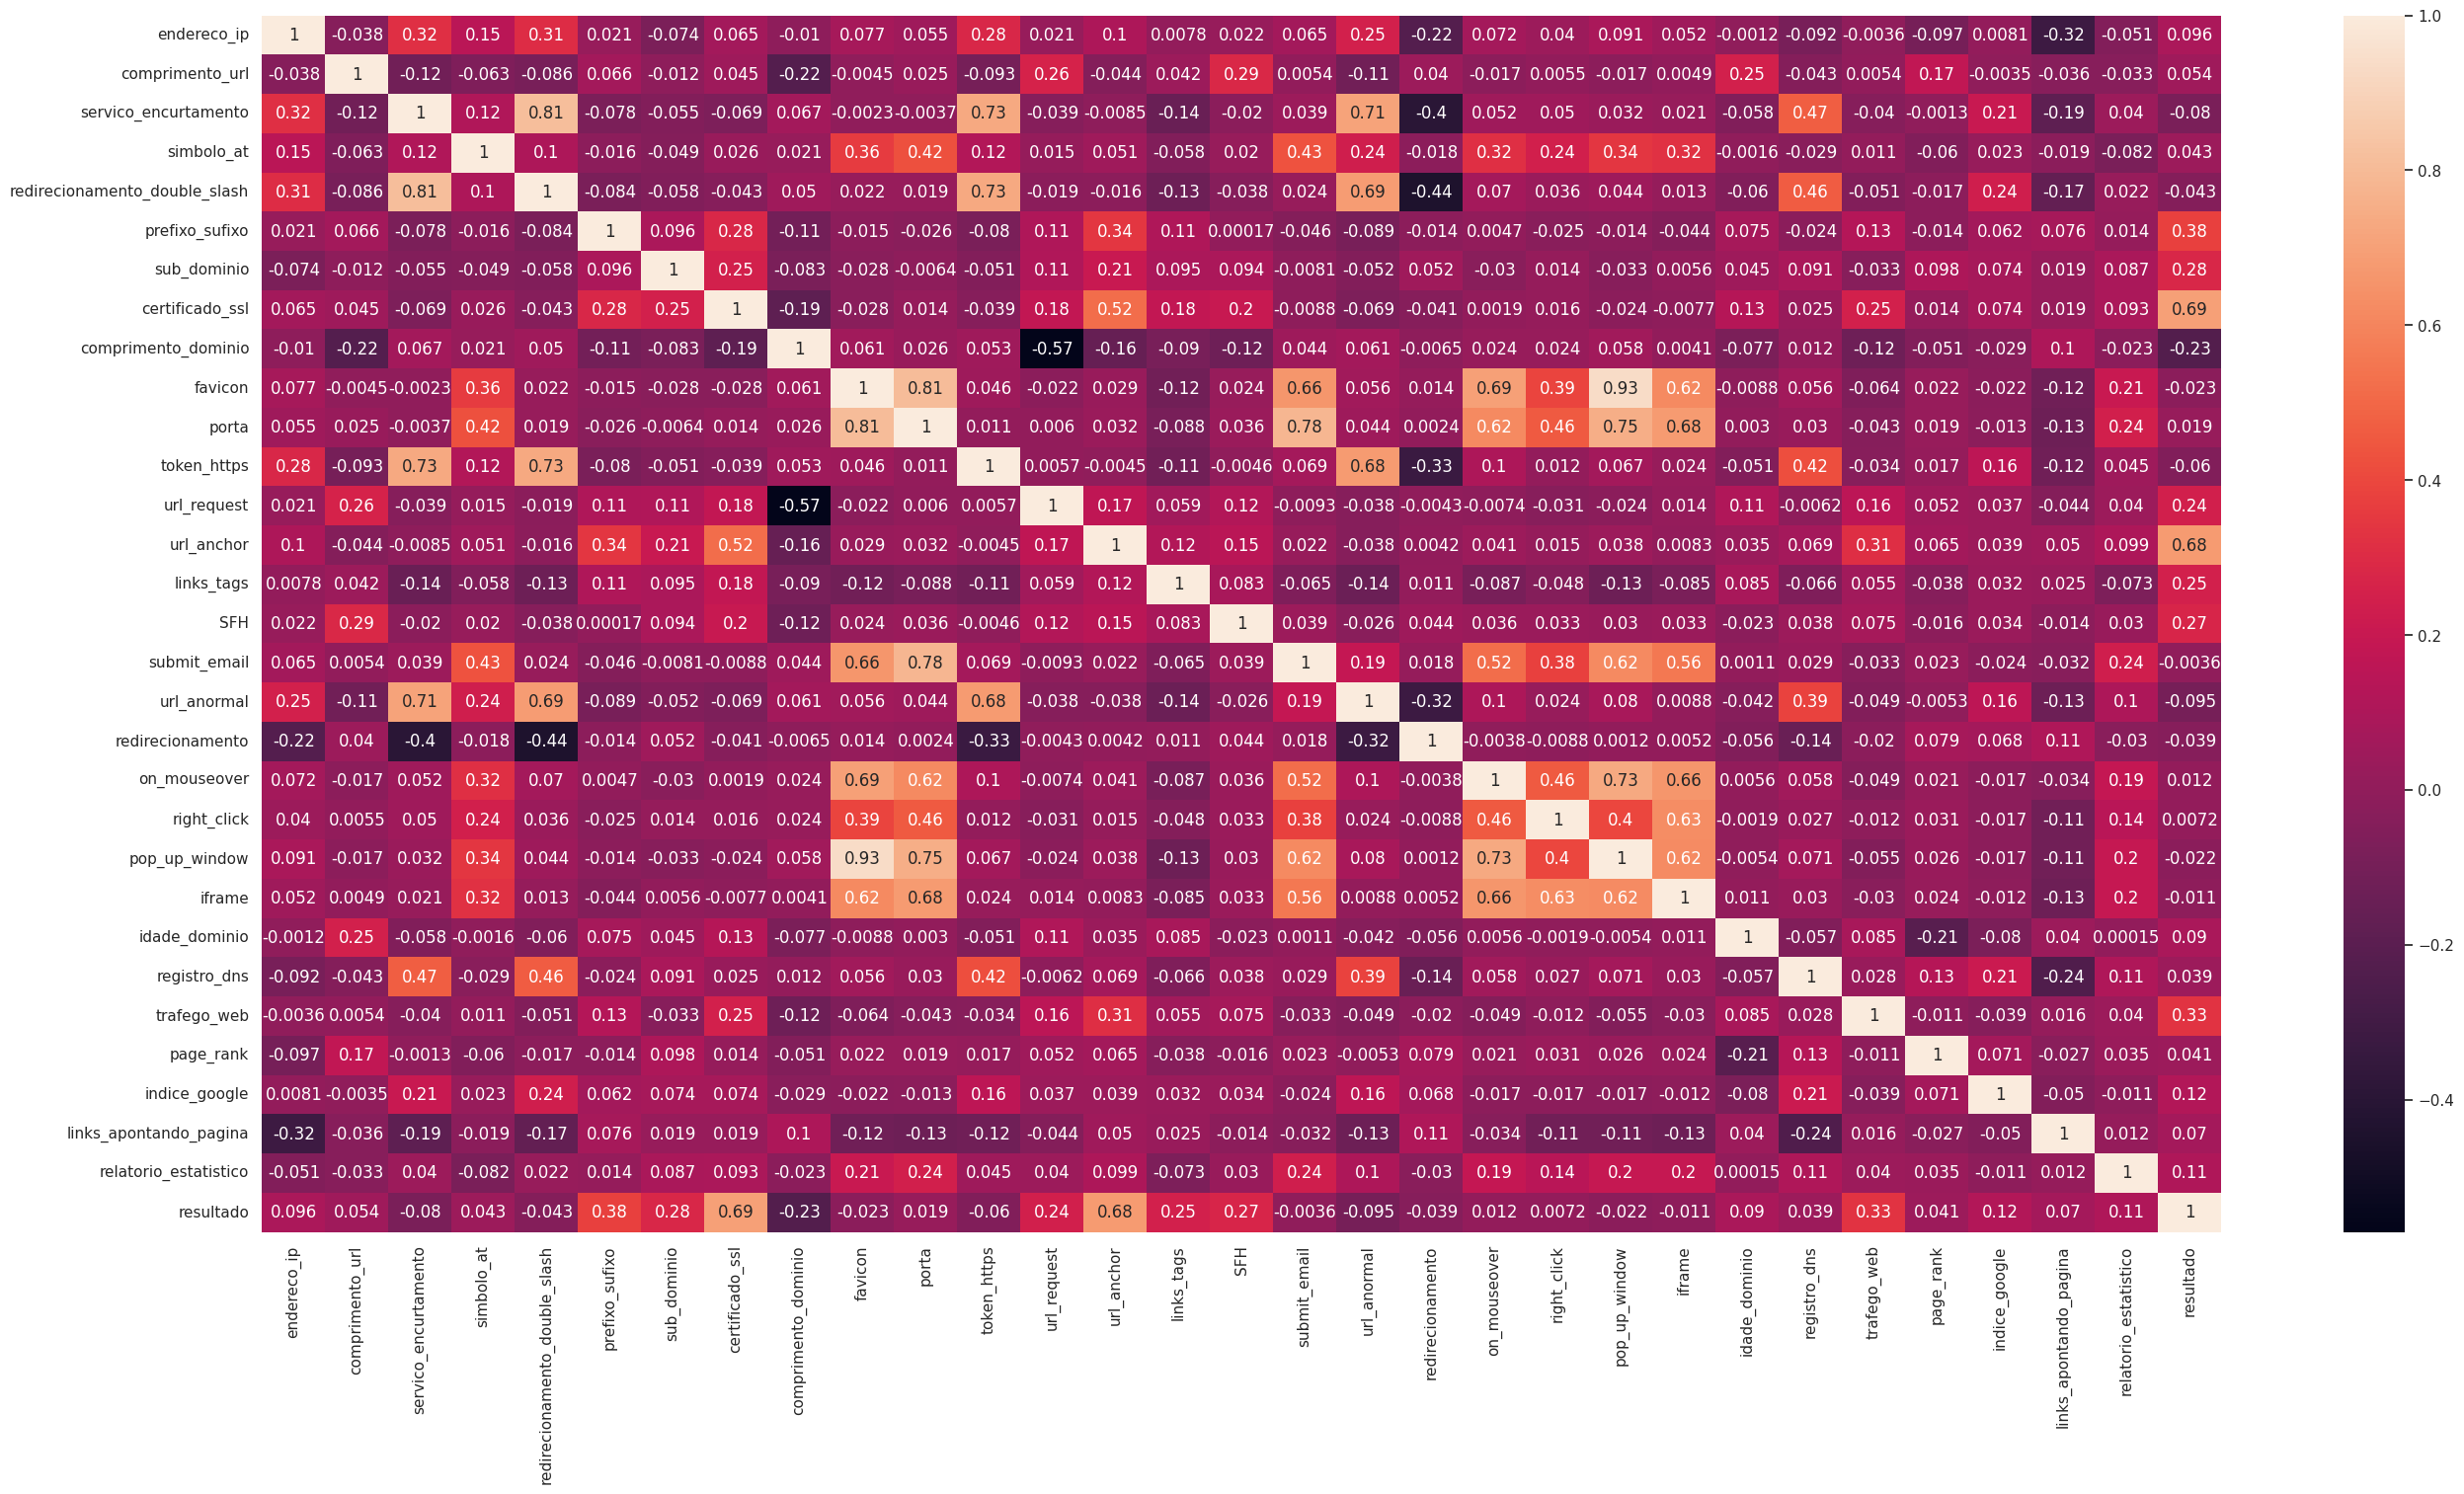

In [29]:
# Avaliando as mesmas correlações via gráfico
sns.set(rc = {'figure.figsize': (32, 16)}) #tamanho do gráfico
sns.heatmap(corr, annot = True) # Gráfico mapa de calor